#**Car Acceptability Classification Dataset**
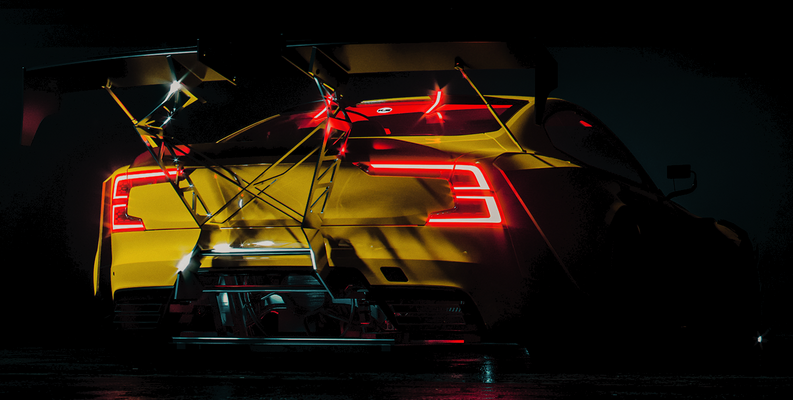

###**Source:**  [kaggle](https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset/data)

###**Features:**
1. Buying_Price - Categorical Data [vhigh, high, med, low]
2. Maintenance_Price - Categorical Data [vhigh, high, med, low]
3. No_of_Doors - Categorical Data [2, 3, 4, 5more]
4. Person_Capacity - Categorical Data [2, 4, more]
5. Size_of_Luggage - Categorical Data [small, med, big]
6. Safety - Categorical Data [low, med, high]
7. Car_Acceptability - Categorical Data [unacc, acc, good, vgood

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
df = pd.read_csv('car.csv')

In [ ]:
#print the info/summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


1. The dataset contains 1728 entries with 7 columns

2. There are no missing values in the dataset but all colomns are categorial.

In [ ]:
#print first 5 rows
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


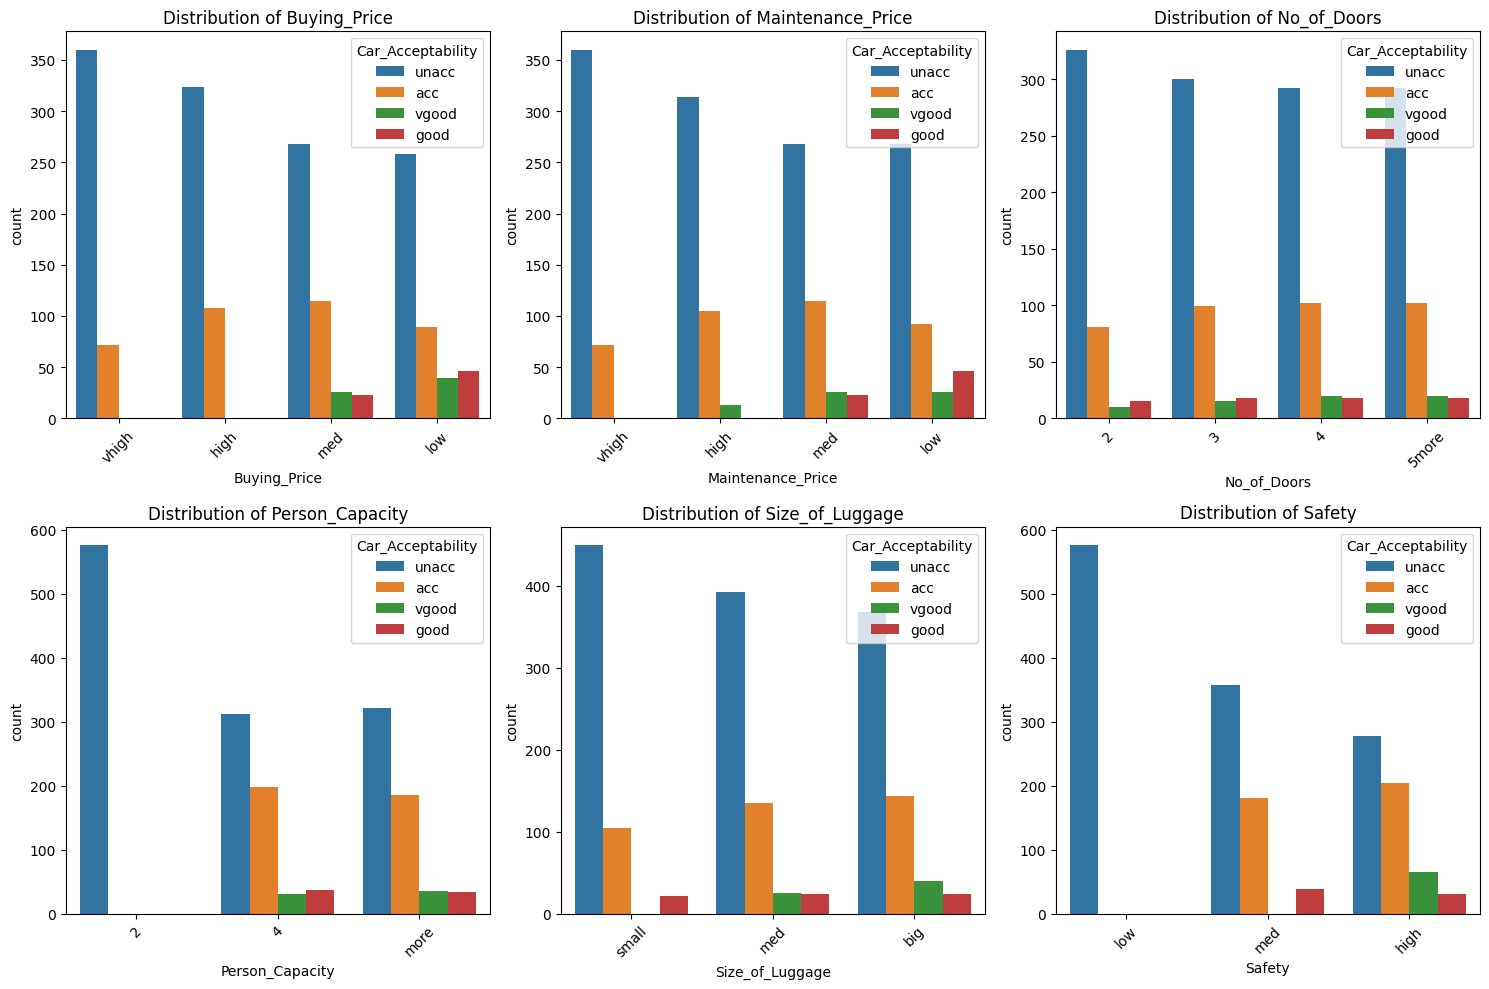

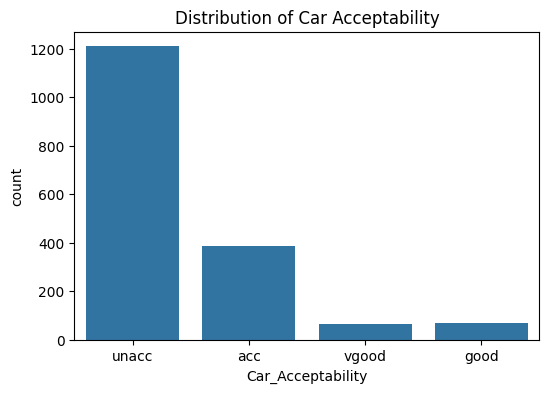

In [ ]:
# countplot for categorical distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue='Car_Acceptability')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Car_Acceptability')
plt.title('Distribution of Car Acceptability')
plt.show()

1. Target Variable (Car_Acceptability):

 * Highly imbalanced with 'unacc' being the most common class (70% of data) around 1200 datapoints

 * Other classes: 'acc' has around 400 datapoints, 'good' and 'vgood' has very few datapoints

2. Feature Distributions:

 * Buying_Price: Most cars have medium or low buying prices

 * Maintenance_Price: Similar distribution to buying price

 * No_of_Doors: 4 doors is most common, followed by 5more

 * Person_Capacity: Most cars accommodate 2 or 4 people

 * Size_of_Luggage: Fairly even distribution

 * Safety: Most cars have medium safety rating

In [ ]:
# Convert target to binary (acceptable vs unacceptable)
df['Acceptable'] = df['Car_Acceptability'].apply(lambda x: 1 if x in ['acc', 'good', 'vgood'] else 0)

# Ordinal encoding for ordinal features
ordinal_mapping = {
    'Buying_Price': {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0},
    'Maintenance_Price': {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0},
    'Safety': {'low': 0, 'med': 1, 'high': 2}
}

for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

# One-hot encoding for nominal features
nominal_cols = ['No_of_Doors', 'Person_Capacity', 'Size_of_Luggage']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)



1. Target Transformation:

  * Converted multiclass problem to binary (acceptable vs unacceptable) since logistic regression is binary classifier

  * This simplifies our initial analysis while maintaining the key business question

2. Feature Encoding:

  * Ordinal features (Buying_Price, Maintenance_Price, Safety) encoded with meaningful ordinal values

  * Nominal features (No_of_Doors, Person_Capacity, Size_of_Luggage) one-hot encoded

  * Resulting in 13 features after encoding

In [ ]:
# Split into features and target
X = df.drop(['Car_Acceptability', 'Acceptable'], axis=1)
y = df['Acceptable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Data Splitting:

 * 70-30 split with stratification to maintain class distribution

 * Features scaled to help logistic regression converge better

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9094412331406551
Precision: 0.8609271523178808
Recall: 0.8333333333333334
F1 Score: 0.8469055374592834


The model performs reasonably well with 90.9% accuracy, but recall could be improved (only catching 83% of acceptable cars).

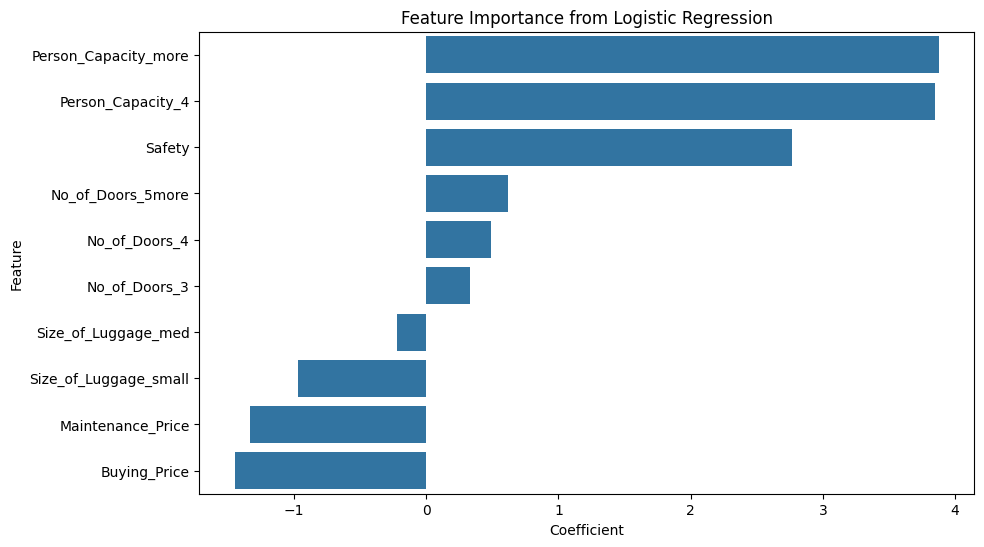

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()

1. Positive Coefficients: Features like Person_Capacity_more, Person_Capacity_4, and Safety contribute to increasing the predicted probability of the target class (e.g., a "positive" outcome like car purchase).

2. Negative Coefficients: Features like Maintenance_Price and Buying_Price reduce the predicted probability, likely because higher costs deter the outcome (e.g., lower likelihood of purchase).

3. Person_Capacity_more and Person_Capacity_4 have the largest positive coefficients (values ~3–4), suggesting they are strong drivers of the outcome.

Buying_Price has a significant negative impact (value ~-1), indicating it’s a critical deterrent.

Neutral or Weak Predictors:

Features like Size_of_Luggage_med or No_of_Doors_3 have coefficients near zero, implying minimal impact on predictions.

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                         param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate optimized model
y_pred_optimized = best_logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Precision:", precision_score(y_test, y_pred_optimized))
print("Recall:", recall_score(y_test, y_pred_optimized))
print("F1 Score:", f1_score(y_test, y_pred_optimized))

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9132947976878613
Precision: 0.8627450980392157
Recall: 0.8461538461538461
F1 Score: 0.8543689320388349


1. Using these parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
\
the recall increased to 84% from 83%


In [ ]:
# Evaluate model
training_accuracy = logreg.score(X_train_scaled, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.9321753515301903
Testing Accuracy: 0.9094412331406551


There is no overfitting or underfitting issues as the training and testing accuracy dose not have huge diferrence

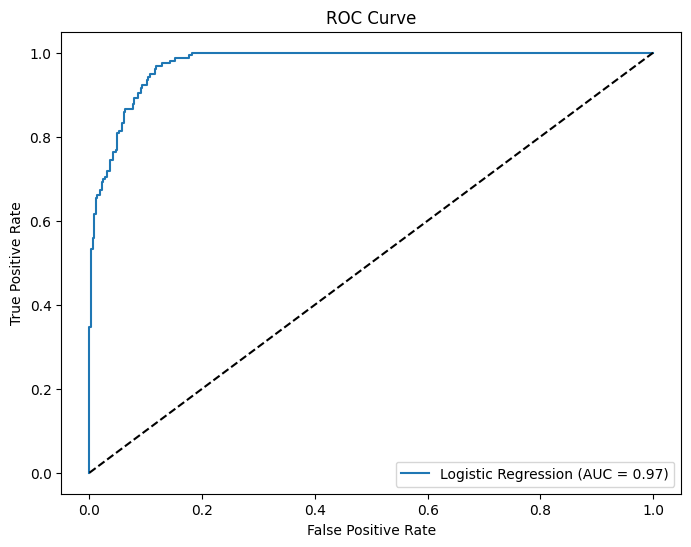

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve in the image shows the performance of a Logistic Regression model, which has an AUC (Area Under the Curve) of 0.97. The x-axis represents the False Positive Rate (FPR), and the y-axis represents the True Positive Rate (TPR).

Key Inferences:
1. High AUC (0.97): The model has excellent discriminatory power, as an AUC close to 1 indicates near-perfect classification performance.

2. Low False Positive Rate: The curve is steep and close to the top-left corner, suggesting the model achieves high TPR while keeping FPR low, which is ideal.

3. Model Suitability: Logistic Regression is performing exceptionally well for this task, making it a strong candidate for the given classification problem.

###**Inference:**

1. The logistic regression model achieved 91.3% accuracy with AUC of 0.97

2. It's particularly good at predicting unacceptable cars

3. Could be improved for better recall of acceptable cars

4. Safety rating is the most important factor in car acceptability
5. Very high prices significantly reduce car acceptability
6. The model achieves good overall accuracy but could improve in identifying acceptable cars
7. Model AUC of 0.97 indicates excellent discrimination ability